A simple(do not go deep into algorithms and APIs) Machine Learning example, just like a 'Hello World' program in Programming Languages. This example comes from *Machine Learning Mastery with Python* book.

## Machine Learning Project Template in Python

1. Prepare Problem
    - Load libraries
    - Load dataset
2. Summarize Data
    - Descriptive statistics
    - Data visualizations
3. Prepare Data
    - Data Cleaning
    - Feature Selection
    - Data Transforms
4. Evaluate Algorithms
    - Split-out validation dataset
    - Test options and evaluation metric
    - Spot-Check Algorithms
    - Compare Algorithms
5. Improve Accuracy
    - Algorithms Tuning
    - Ensembles
6. Finalize Model
    - Predictions on validation dataset
    - Create standalone model on entire training dataset
    - Save model for later use

## 1. Prepare Problem

Dataset description(comes from *sklearn.dataset.load_boston*):

Boston House Prices dataset

Notes
------
Data Set Characteristics:

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive

    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

In [42]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [8]:
# Load Dataset
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv('../../SampleData/housing.csv', names=names, delim_whitespace=True)

## 2. Summarize Data

In [19]:
# shape: rows and columns
print(dataset.shape)

# types
print(dataset.dtypes)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [21]:
# eyeball
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.3e-03,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296.0,15.3,396.9,5.0,24.0
1,2.7e-02,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242.0,17.8,396.9,9.1,21.6
2,2.7e-02,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242.0,17.8,392.8,4.0,34.7
3,3.2e-02,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222.0,18.7,394.6,2.9,33.4
4,6.9e-02,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222.0,18.7,396.9,5.3,36.2
5,3.0e-02,0.0,2.2,0,0.5,6.4,58.7,6.1,3,222.0,18.7,394.1,5.2,28.7
6,8.8e-02,12.5,7.9,0,0.5,6.0,66.6,5.6,5,311.0,15.2,395.6,12.4,22.9
7,1.4e-01,12.5,7.9,0,0.5,6.2,96.1,6.0,5,311.0,15.2,396.9,19.1,27.1
8,2.1e-01,12.5,7.9,0,0.5,5.6,100.0,6.1,5,311.0,15.2,386.6,29.9,16.5
9,1.7e-01,12.5,7.9,0,0.5,6.0,85.9,6.6,5,311.0,15.2,386.7,17.1,18.9


In [17]:
# description
pandas.set_option('precision', 1)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [12]:
# correlations between all of the numeric attributes
pandas.set_option('precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


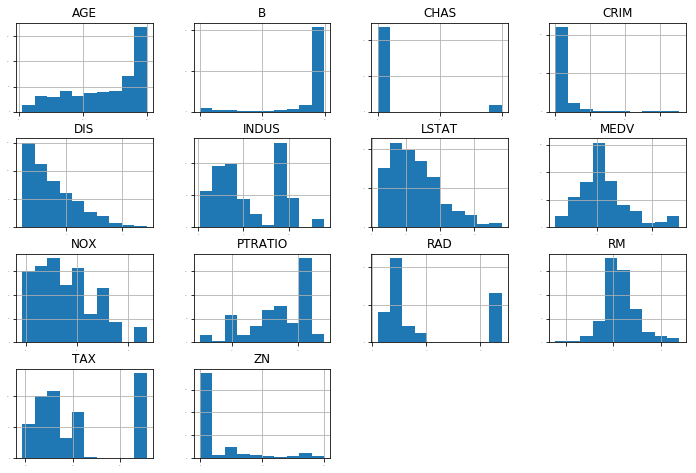

In [23]:
# histogram
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 8))
plt.show()

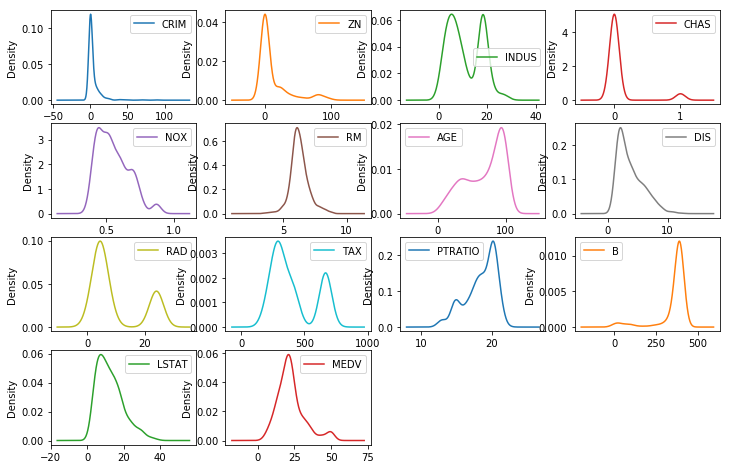

In [29]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(12, 8))
plt.show()

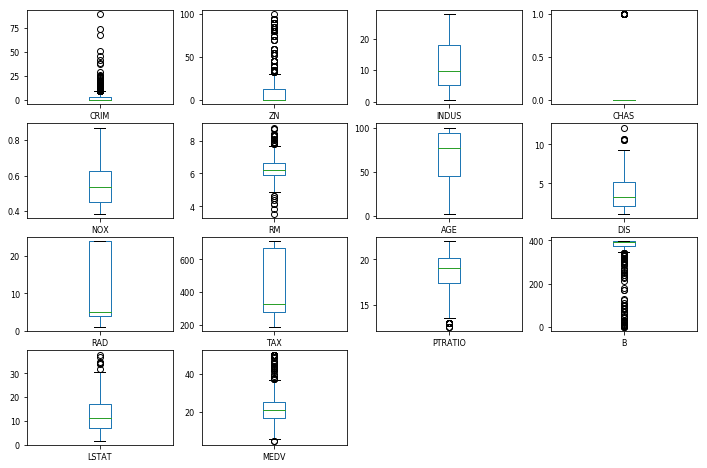

In [31]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, fontsize=8, figsize=(12, 8))
plt.show()

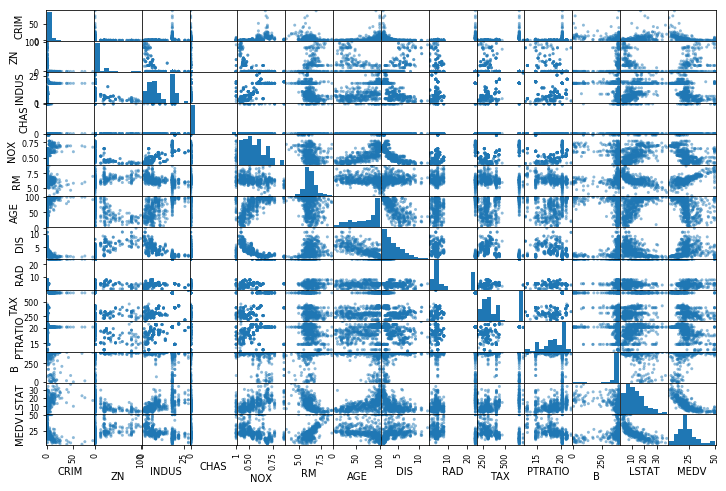

In [33]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(12, 8))
plt.show()

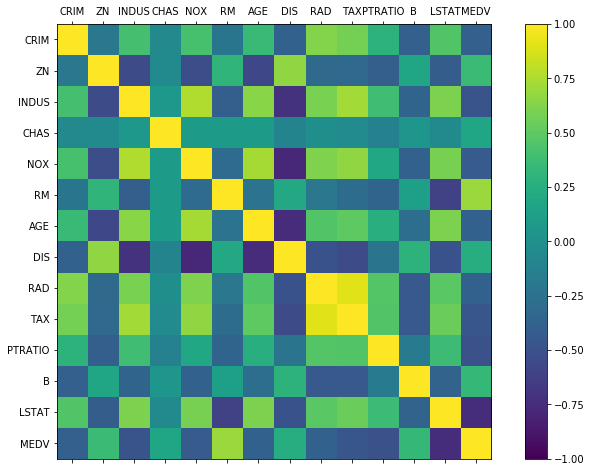

In [39]:
# correlation matrix
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [40]:
# Split-out validation dataset
array = dataset.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [45]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [43]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [46]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.046143 (12.658938)
SVR: -85.518342 (31.994798)


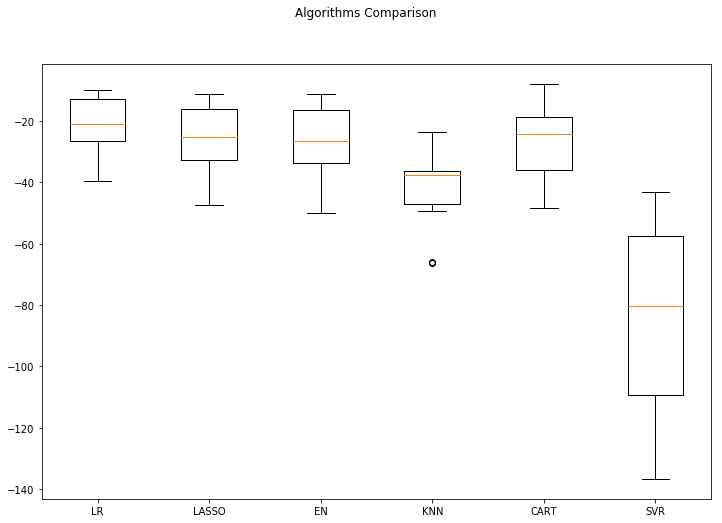

In [48]:
# Compare Algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaleLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaleLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -25.184178 (12.261838)
ScaledSVR: -29.633086 (17.009186)


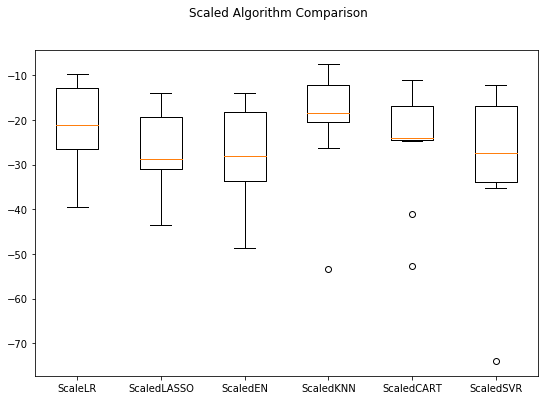

In [52]:
# Compare Algorithms
fig = plt.figure(figsize=(9,6))
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

In [59]:
# Tune KNN 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
                    cv=list(kfold.split(rescaledX, Y_train)))   # caution!!!
grid_result = grid.fit(rescaledX, Y_train)

In [60]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: -18.172137 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


In [62]:
# Ensemble Methods
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.240267 (5.805945)
ScaledGBM: -10.401108 (4.710436)
ScaledRF: -13.581151 (6.796815)
ScaledET: -10.782758 (5.694381)


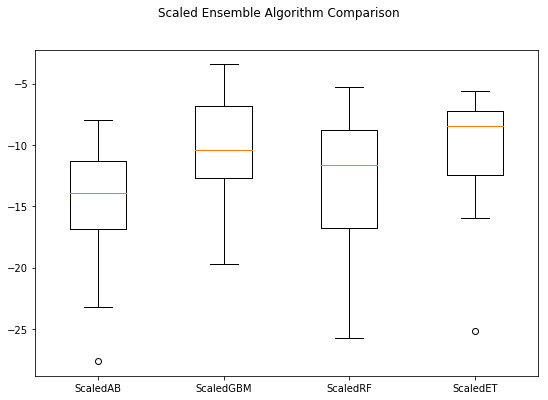

In [64]:
# Compare Algorithms
fig = plt.figure(figsize=(9,6))
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
# Tune Ensemble Methods
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, 
                    cv=list(kfold.split(rescaledX, Y_train)))
grid_result = grid.fit(rescaledX, Y_train)

In [66]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: -9.356471 using {'n_estimators': 400}
-10.794196 (4.711473) with: {'n_estimators': 50}
-10.023378 (4.430026) with: {'n_estimators': 100}
-9.677657 (4.264829) with: {'n_estimators': 150}
-9.523680 (4.259064) with: {'n_estimators': 200}
-9.432755 (4.250884) with: {'n_estimators': 250}
-9.414258 (4.262219) with: {'n_estimators': 300}
-9.353381 (4.242264) with: {'n_estimators': 350}
-9.339880 (4.255717) with: {'n_estimators': 400}


## Finalize Model

In [67]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

In [68]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.8752520792
